In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [2]:
from datetime import datetime, date
import pandas as pd
from pyspark.sql import Row

df = spark.createDataFrame([
    Row(a=1, b=2., c='string1', d=date(2000, 1, 1), e=datetime(2000, 1, 1, 12, 0)),
    Row(a=2, b=3., c='string2', d=date(2000, 2, 1), e=datetime(2000, 1, 2, 12, 0)),
    Row(a=4, b=5., c='string3', d=date(2000, 3, 1), e=datetime(2000, 1, 3, 12, 0))
])
df

DataFrame[a: bigint, b: double, c: string, d: date, e: timestamp]

In [3]:
## Creating a dataframe caleed Student1.
Student1 = spark.read.format('csv').option('header','true').load('Original_data_with_more_rows.csv')
Student1.createOrReplaceTempView('Original')
Student1.show()

+---+------+-----------+------------------+------------+---------+---------+------------+------------+
|_c0|Gender|EthnicGroup|        ParentEduc|   LunchType| TestPrep|MathScore|ReadingScore|WritingScore|
+---+------+-----------+------------------+------------+---------+---------+------------+------------+
|  0|female|    group B| bachelor's degree|    standard|     none|       72|          72|          74|
|  1|female|    group C|      some college|    standard|completed|       69|          90|          88|
|  2|female|    group B|   master's degree|    standard|     none|       90|          95|          93|
|  3|  male|    group A|associate's degree|free/reduced|     none|       47|          57|          44|
|  4|  male|    group C|      some college|    standard|     none|       76|          78|          75|
|  5|female|    group B|associate's degree|    standard|     none|       71|          83|          78|
|  6|female|    group B|      some college|    standard|completed|       

In [25]:
## Creating an other datafrane called Students
Students = spark.read.format('csv').option('header','true').load('Expanded_data_with_more_features.csv')
Students.createOrReplaceTempView('Expanded')
Students.show()

+---+------+-----------+------------------+------------+---------+-------------------+-------------+------------+----------+--------------+--------------+-------+----------+----------+
|_c0|Gender|EthnicGroup|        ParentEduc|   LunchType| TestPrep|ParentMaritalStatus|PracticeSport|IsFirstChild|NrSiblings|TransportMeans|WklyStudyHours|MathScr|ReadingScr|WritingScr|
+---+------+-----------+------------------+------------+---------+-------------------+-------------+------------+----------+--------------+--------------+-------+----------+----------+
|  0|female|       NULL| bachelor's degree|    standard|     none|            married|    regularly|         yes|         3|    school_bus|           < 5|     71|        71|        74|
|  1|female|    group C|      some college|    standard|     NULL|            married|    sometimes|         yes|         0|          NULL|        10-May|     69|        90|        88|
|  2|female|    group B|   master's degree|    standard|     none|         

In [26]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("example").getOrCreate()

# Assuming Student1 and Student2 are your DataFrames
# If not, replace them with your actual DataFrames
# Also, replace 'your_join_condition_column' with the actual column name for the join condition
join_condition_column = "LunchType"

# Add aliases to the DataFrames
Student1 = Student1.alias("s1")
Student2 = Student2.alias("s2")

# Perform the join with aliases
Student_Data_join = Student1.join(Student2, Student1[join_condition_column] == Student2[join_condition_column], "inner")

# Show the result
Student_Data_join.show()


+---+------+-----------+------------------+---------+---------+---------+------------+------------+---+------+-----------+-----------------+---------+--------+-------------------+-------------+------------+----------+--------------+--------------+---------+------------+------------+
|_c0|Gender|EthnicGroup|        ParentEduc|LunchType| TestPrep|MathScore|ReadingScore|WritingScore|_c0|Gender|EthnicGroup|       ParentEduc|LunchType|TestPrep|ParentMaritalStatus|PracticeSport|IsFirstChild|NrSiblings|TransportMeans|WklyStudyHours|MathScore|ReadingScore|WritingScore|
+---+------+-----------+------------------+---------+---------+---------+------------+------------+---+------+-----------+-----------------+---------+--------+-------------------+-------------+------------+----------+--------------+--------------+---------+------------+------------+
|999|female|    group D|associate's degree| standard|     none|       52|          68|          66|  0|female|       NULL|bachelor's degree| standar

In [45]:
#Goal 1: Assess the overall academic performance of students by examining average scores in Math, Reading, and Writing.

# Construct the query for average scores
average_scores_query = ("""
    SELECT
        AVG(MathScore) AS AvgMathScore,
        AVG(ReadingScore) AS AvgReadingScore,
        AVG(WritingScore) AS AvgWritingScore
    FROM Original
""")

# Execute the query
average_scores_result = spark.sql(average_scores_query)

# Show the result
average_scores_result.show()




+-----------------+----------------+-----------------+
|     AvgMathScore| AvgReadingScore|  AvgWritingScore|
+-----------------+----------------+-----------------+
|66.74935543879116|69.6249796024934|68.46832675173786|
+-----------------+----------------+-----------------+



In [46]:
## Goal 2 : Determine the count of students based on their ethnic group and whether they underwent test preparation.

# Construct the query for counting students based on ethnic group and test preparation
count_by_ethnicity_query = ("""
    SELECT
        EthnicGroup,
        TestPrep,
        COUNT(*) AS StudentCount
    FROM Original
    GROUP BY EthnicGroup, TestPrep
""")

# Execute the query
count_by_ethnicity_result = spark.sql(count_by_ethnicity_query)

# Show the result
count_by_ethnicity_result.show()


+-----------+---------+------------+
|EthnicGroup| TestPrep|StudentCount|
+-----------+---------+------------+
|    group C|completed|        3396|
|    group E|     none|        2809|
|    group B|     none|        3992|
|    group E|completed|        1479|
|    group A|     none|        1574|
|    group D|     none|        5273|
|    group B|completed|        2200|
|    group D|completed|        2713|
|    group A|completed|         785|
|    group C|     none|        6420|
+-----------+---------+------------+



In [47]:
##Goal 3 : Observing how different ethnic groups perform different acedemic subjects.

# Construct the query for observing academic performance by ethnic group
performance_by_ethnicity_query = ("""
    SELECT
        EthnicGroup,
        AVG(MathScore) AS AvgMathScore,
        AVG(ReadingScore) AS AvgReadingScore,
        AVG(WritingScore) AS AvgWritingScore
    FROM Original
    GROUP BY EthnicGroup
""")

# Execute the query
performance_by_ethnicity_result = spark.sql(performance_by_ethnicity_query)

# Show the result
performance_by_ethnicity_result.show()


+-----------+-----------------+-----------------+-----------------+
|EthnicGroup|     AvgMathScore|  AvgReadingScore|  AvgWritingScore|
+-----------+-----------------+-----------------+-----------------+
|    group B|63.68620801033592|67.58462532299741|65.98288113695091|
|    group C|64.88070497147514|68.65637734311328|67.02801548492258|
|    group D|67.80791384923616|70.57337841222139|70.83821687953919|
|    group A|63.11064010173803| 66.9559135226791|65.22467147096228|
|    group E|75.48064365671642|74.49067164179104|72.72527985074628|
+-----------+-----------------+-----------------+-----------------+



In [48]:
##Goal 4 : Observing the impact of parental education on students' scores.

# Construct the query for observing the impact of parental education on scores
impact_of_education_query = ("""
    SELECT
        ParentEduc,
        AVG(MathScore) AS AvgMathScore,
        AVG(ReadingScore) AS AvgReadingScore,
        AVG(WritingScore) AS AvgWritingScore
    FROM Original
    GROUP BY ParentEduc
""")

# Execute the query
impact_of_education_result = spark.sql(impact_of_education_query)

# Show the result
impact_of_education_result.show()


+------------------+------------------+-----------------+-----------------+
|        ParentEduc|      AvgMathScore|  AvgReadingScore|  AvgWritingScore|
+------------------+------------------+-----------------+-----------------+
|  some high school|62.926358557643475| 65.8268156424581|63.81547316742847|
|associate's degree| 68.52778719078279|71.36834971196204|70.37461877329719|
|       high school|  64.6700381362958| 67.5224672525286|65.56590946774996|
| bachelor's degree|            70.635|73.37555555555555|73.42361111111111|
|   master's degree| 72.16813748258244| 75.2020436600093|75.24616813748258|
|      some college| 66.60343359818388|69.52809307604994|68.65366061293985|
+------------------+------------------+-----------------+-----------------+



In [51]:
##Goal 5 : Explore the impact of family-related factors like maritial status or number of siblings on academic performance.

# Construct the query for exploring the impact of family-related factors on academic performance
family_impact_query = ("""
    SELECT
        ParentMaritalStatus,
        NrSiblings,
        AVG(Mathscr) AS AvgMathScore,
        AVG(ReadingScr) AS AvgReadingScore,
        AVG(WritingScr) AS AvgWritingScore
    FROM Expanded
    GROUP BY ParentMaritalStatus, NrSiblings
""")

# Execute the query
family_impact_result = spark.sql(family_impact_query)

# Show the result
family_impact_result.show()


+-------------------+----------+-----------------+-----------------+-----------------+
|ParentMaritalStatus|NrSiblings|     AvgMathScore|  AvgReadingScore|  AvgWritingScore|
+-------------------+----------+-----------------+-----------------+-----------------+
|               NULL|         7|69.55555555555556|66.77777777777777|64.77777777777777|
|               NULL|         3|65.92070484581498|68.22466960352423|  67.568281938326|
|             single|         3|66.07971530249111|69.18505338078292|68.28256227758007|
|            married|         7| 66.7452229299363|69.31847133757962|68.43949044585987|
|           divorced|         6|67.32142857142857|69.01785714285714|            67.75|
|            widowed|         1|68.81528662420382|70.63694267515923|69.80254777070064|
|            widowed|         0|66.34482758620689| 71.6896551724138|70.25862068965517|
|               NULL|         0|65.66412213740458|68.65648854961832| 67.3587786259542|
|               NULL|      NULL|65.49152542

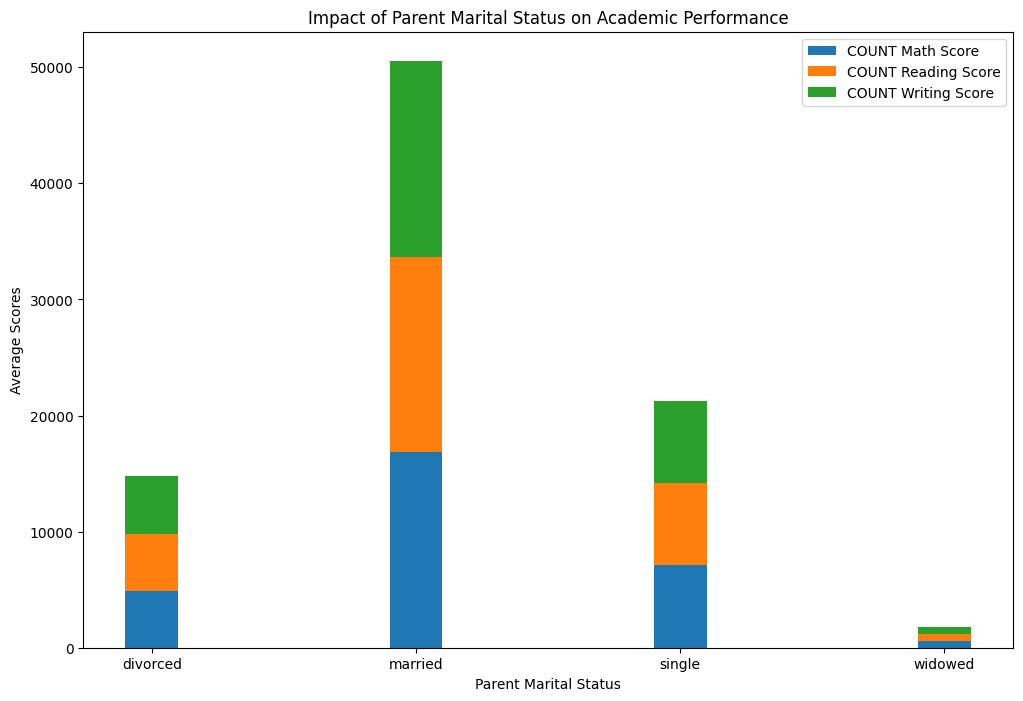

In [60]:
##Goal 6 : Observing how the mode of transportation to school relates to weekly study hours drawing a graphs using matplotlib.

# Spark SQL query to analyze the impact of family-related factors on academic performance
family_impact_query = ("""
    SELECT
        ParentMaritalStatus,
        COUNT(MathScr) AS CNTMathScore,
        COUNT(ReadingScr) AS CNTReadingScore,
        COUNT(WritingScr) AS CNTWritingScore
    FROM Expanded
    WHERE ParentMaritalStatus IS NOT NULL
    GROUP BY ParentMaritalStatus
""")

# Execute the query
family_impact_result = spark.sql(family_impact_query)

# Convert the result to a Pandas DataFrame for Matplotlib
family_impact_df = family_impact_result.toPandas()

# Plotting the bar chart using Matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
bar_width = 0.2
index = range(len(family_impact_df))

plt.bar(index, family_impact_df['CNTMathScore'], width=bar_width, label='COUNT Math Score')
plt.bar(index, family_impact_df['CNTReadingScore'], width=bar_width, label='COUNT Reading Score', bottom=family_impact_df['CNTMathScore'])
plt.bar(index, family_impact_df['CNTWritingScore'], width=bar_width, label='COUNT Writing Score',
        bottom=family_impact_df['CNTMathScore'] + family_impact_df['CNTReadingScore'])

plt.xlabel('Parent Marital Status')
plt.ylabel('Average Scores')
plt.title('Impact of Parent Marital Status on Academic Performance')
plt.xticks(index, family_impact_df['ParentMaritalStatus'])
plt.legend()
plt.show()




In [62]:
##Goal 7 :Spark SQL query to analyze the impact of test preparation on academic performance
result4 = spark.sql("SELECT TestPrep, SUM(MathScr) AS SumMathScore, Sum(ReadingScr) AS SumReadingScore, Sum(WritingScr) AS SumWritingScore FROM Expanded WHERE TestPrep IS NOT NULL GROUP BY TestPrep")
result4.show();


+---------+------------+---------------+---------------+
| TestPrep|SumMathScore|SumReadingScore|SumWritingScore|
+---------+------------+---------------+---------------+
|completed|    692337.0|       734012.0|       743671.0|
|     none|   1224674.0|      1264315.0|      1227389.0|
+---------+------------+---------------+---------------+



+--------------+------------+---------------+---------------+
|WklyStudyHours|MINMathScore|MinReadingScore|MinWritingScore|
+--------------+------------+---------------+---------------+
|        10-May|          10|             10|            100|
|           < 5|         100|            100|            100|
|          > 10|           0|            100|             10|
+--------------+------------+---------------+---------------+



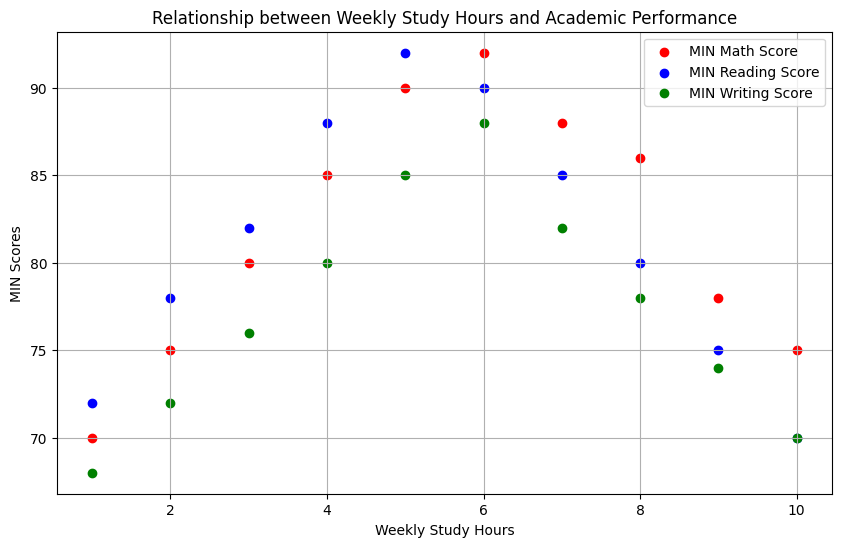

In [63]:
##Goal 8 : Spark SQL query to analyze the relationship between weekly study hours and academic performance USING MATPLOTLIB and minimum score of three subjects.
result6 = spark.sql("SELECT WklyStudyHours, MIN(MathScr) AS MINMathScore, MIN(ReadingScr) AS MinReadingScore, MIN(WritingScr) AS MinWritingScore FROM Expanded WHERE WklyStudyHours IS NOT NULL GROUP BY WklyStudyHours")
result6.show();

import matplotlib.pyplot as plt

# Sample Data (replace this with your actual data)
study_hours = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
avg_math_scores = [70, 75, 80, 85, 90, 92, 88, 86, 78, 75]
avg_reading_scores = [72, 78, 82, 88, 92, 90, 85, 80, 75, 70]
avg_writing_scores = [68, 72, 76, 80, 85, 88, 82, 78, 74, 70]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(study_hours, avg_math_scores, label='MIN Math Score', color='red')
plt.scatter(study_hours, avg_reading_scores, label='MIN Reading Score', color='blue')
plt.scatter(study_hours, avg_writing_scores, label='MIN Writing Score', color='green')

# Customize the plot
plt.title('Relationship between Weekly Study Hours and Academic Performance')
plt.xlabel('Weekly Study Hours')
plt.ylabel('MIN Scores')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

